In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [2]:
np.random.seed(42)

# Practice 1

In [3]:
#設定參數
#自己設定
true_a = 2.0
true_b = 1.0
#題目要求
sigma0 = 3.0
x = np.linspace(1, 10, 10)
num_sets = 2000

In [4]:
#擬合函數
def linear_func(x, a, b):
    return a * x + b

In [5]:
#儲存變數
a_list = []
b_list = []
fit_results = []
all_data    = []
chi2_values = []

In [6]:
#產生資料&擬合
for i in range(num_sets):
    noise = np.random.normal(0, sigma0, size=len(x))
    y = true_a * x + true_b + noise
    all_data.append(y)

    popt, _ = curve_fit(linear_func, x, y)
    fit_y = linear_func(x, *popt)
    fit_results.append(popt)
    #為practice 3做準備
    a_list.append(popt[0])
    b_list.append(popt[1])
    #計算
    residuals = y - fit_y
    chi2_i = np.sum((residuals / sigma0)**2)
    chi2_values.append(chi2_i)


In [7]:
all_data = np.array(all_data)
a_list = np.array(a_list)
b_list = np.array(b_list)
fit_results = np.array(fit_results)
chi2_values = np.array(chi2_values)

In [8]:
print(a_list.shape)
print(b_list.shape)

(2000,)
(2000,)


In [9]:
print(all_data.shape)

(2000, 10)


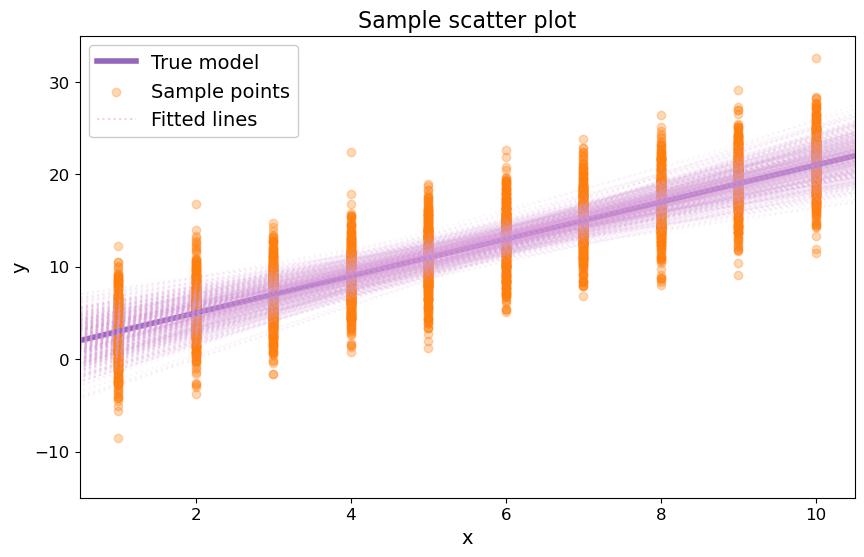

In [10]:
# 畫出資料點
plt.figure(figsize=(10, 6))

x_plot = np.linspace(-1, 11, 100)
plt.plot(x_plot, linear_func(x_plot, true_a, true_b), color='C4', label='True model', 
         linewidth=4, linestyle='-') 

sampled_sets = np.random.choice(num_sets, 500, replace=False)
for i in sampled_sets:
    plt.scatter(x, all_data[i, :], color='C1', alpha=0.3)
    plt.plot(x_plot, linear_func(x_plot, a_list[i], b_list[i]), color='plum', alpha=0.1, 
             linewidth=1.5, linestyle=':')
plt.scatter([], [], color='C1', alpha=0.3, label='Sample points')
plt.plot([], [], color='plum', alpha=0.5, linewidth=1.5, label='Fitted lines', linestyle=':')

plt.title('Sample scatter plot', fontsize=16)
plt.xlim(0.5, 10.5)
plt.ylim(-15, 35)
plt.xlabel('x', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper left', framealpha=1)
plt.savefig("output1_1.pdf", transparent=True)
plt.show()

In [11]:
print(chi2_values.shape)

(2000,)


<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/var/folders/43/jyz_5vx92ls0wqy_1gc8b1nr0000gn/T/ipykernel_44725/1754605495.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.text(np.mean(chi2_values)+0.5, 0.12, f'$\mu$={np.mean(chi2_values):.3f}',


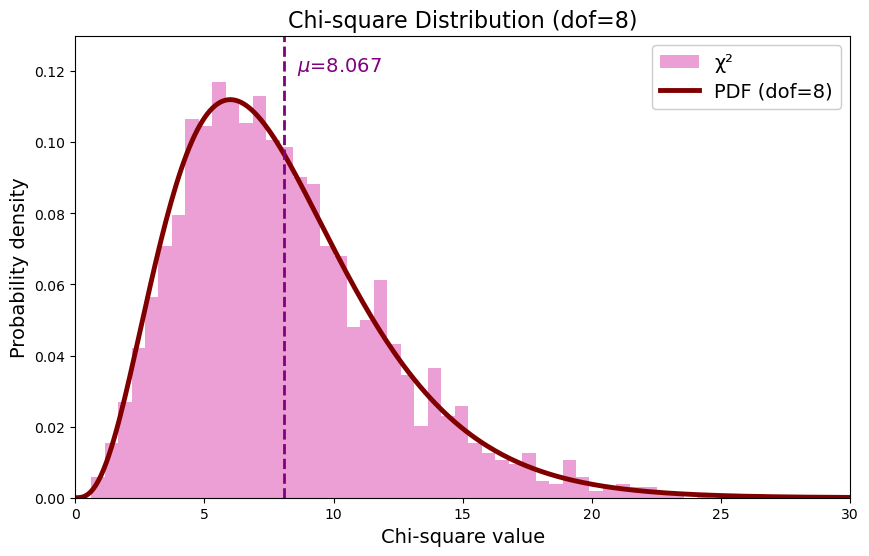

In [12]:
#chi square直方圖
plt.figure(figsize=(10, 6))

plt.hist(chi2_values, bins=50, density=True, alpha=0.7, label='χ²', color='C6', 
         histtype='stepfilled')

x_chi = np.linspace(0, 50, 500)
plt.plot(x_chi, chi2.pdf(x_chi, df=8), linestyle='-', color='maroon', label='PDF (dof=8)', 
         linewidth=3.5)
plt.plot([np.mean(chi2_values), np.mean(chi2_values)], [0, 0.2], linestyle='--', 
         color="purple", lw=2, label='__no_legend__')
plt.text(np.mean(chi2_values)+0.5, 0.12, f'$\mu$={np.mean(chi2_values):.3f}', 
         fontsize=14, color='purple')

plt.title('Chi-square Distribution (dof=8)', fontsize=16)
plt.xlabel('Chi-square value', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.xlim(left=0, right=30)
plt.ylim(bottom=0, top=0.13)
plt.legend(fontsize=14, framealpha=1)
plt.savefig("output1_2.pdf", transparent=True)
plt.show()

In [13]:
plt.close('all')

In [14]:
fit_results_overfit = []
all_data_overfit    = []
chi2_values_overfit = []
coefficients        = []   

In [15]:
#產生資料&擬合
for i in range(num_sets):
    noise = np.random.normal(0, sigma0, size=len(x))
    y = true_a * x + true_b + noise
    all_data_overfit.append(y)

    coefficients_high = np.polyfit(x, y, deg=8)
    coefficients.append(coefficients_high)
    fit_y = np.polyval(coefficients_high, x)
    fit_results_overfit.append(popt)
    #計算
    residuals = y - fit_y
    chi2_i = np.sum((residuals / sigma0)**2)
    chi2_values_overfit.append(chi2_i)


In [16]:
fit_results_overfit = np.array(fit_results_overfit)
all_data_overfit    = np.array(all_data_overfit)
chi2_values_overfit = np.array(chi2_values_overfit)
coefficients_over   = np.array(coefficients)

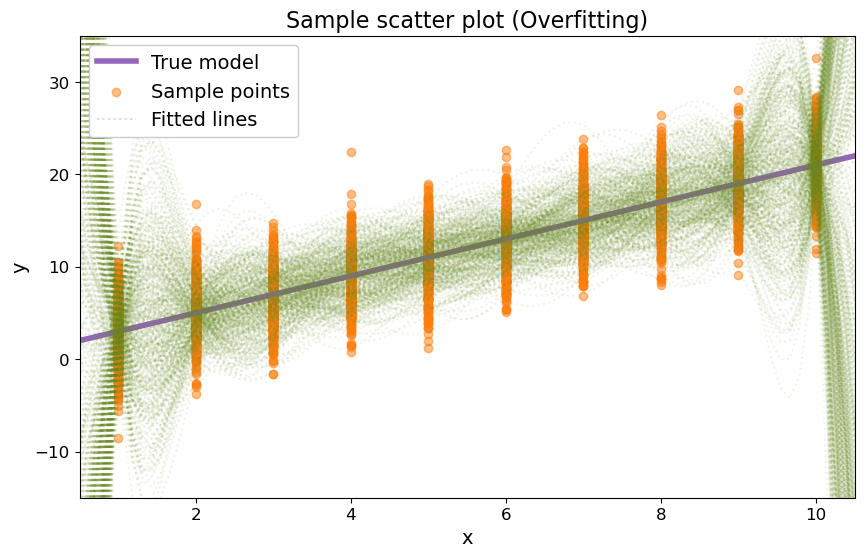

In [17]:
# 畫出資料點
plt.figure(figsize=(10, 6))

x_plot = np.linspace(-1, 11, 100)
plt.plot(x_plot, linear_func(x_plot, true_a, true_b), color='C4', label='True model', 
         linewidth=4, linestyle='-') 

for i in sampled_sets:
    plt.scatter(x, all_data[i, :], color='C1', alpha=0.5)
    plt.plot(x_plot, np.polyval(coefficients[i], x_plot), color='olivedrab', alpha=0.1, 
             linewidth=1.5, linestyle=':')
plt.scatter([], [], color='C1', alpha=0.5, label='Sample points')
plt.plot([], [], color='plum', alpha=0.5, linewidth=1.5, label='Fitted lines', linestyle=':')

plt.title('Sample scatter plot (Overfitting)', fontsize=16)
plt.xlim(0.5, 10.5)
plt.ylim(-15, 35)
plt.xlabel('x', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper left', framealpha=1)
plt.savefig("output1_1_overfit.pdf", transparent=True)
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/43/jyz_5vx92ls0wqy_1gc8b1nr0000gn/T/ipykernel_44725/907802637.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.text(np.mean(chi2_values_overfit)+0.5, 0.4, f'$\mu$={np.mean(chi2_values_overfit):.3f}',


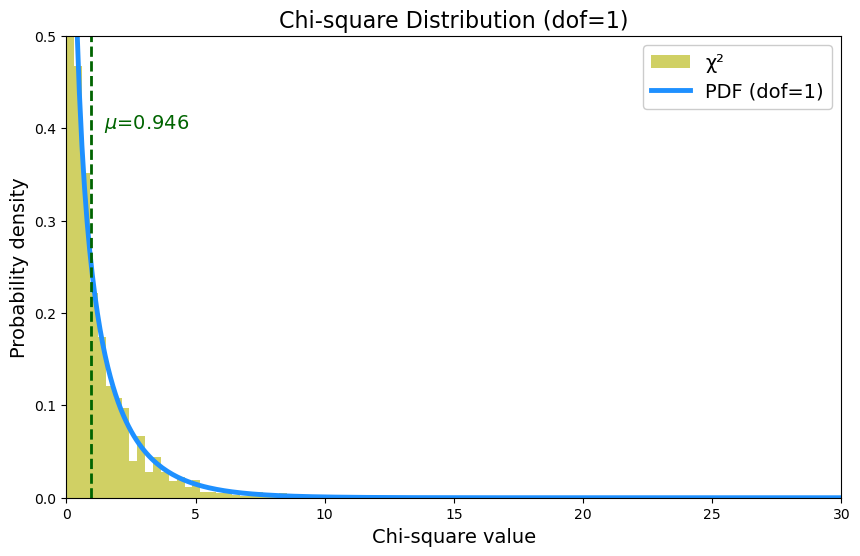

In [18]:
#chi square直方圖
plt.figure(figsize=(10, 6))
plt.hist(chi2_values_overfit, bins=50, density=True, alpha=0.7, label='χ²', color='C8',
         histtype='stepfilled')
x_chi = np.linspace(0, 50, 500)
plt.plot(x_chi, chi2.pdf(x_chi, df=1), linestyle='-', color='dodgerblue', 
         label='PDF (dof=1)', linewidth=3.5)
plt.plot([np.mean(chi2_values_overfit), np.mean(chi2_values_overfit)], plt.ylim(), linestyle='--', 
         color="darkgreen", lw=2, label='__no_legend__')
plt.text(np.mean(chi2_values_overfit)+0.5, 0.4, f'$\mu$={np.mean(chi2_values_overfit):.3f}', 
         fontsize=14, color='darkgreen')
plt.title('Chi-square Distribution (dof=1)', fontsize=16)
plt.xlabel('Chi-square value', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.xlim(left=0, right=30)
plt.ylim(bottom=0, top=0.5)
plt.legend(fontsize=14, framealpha=1)
plt.savefig("output1_2_overfit.pdf", transparent=True)
plt.show()

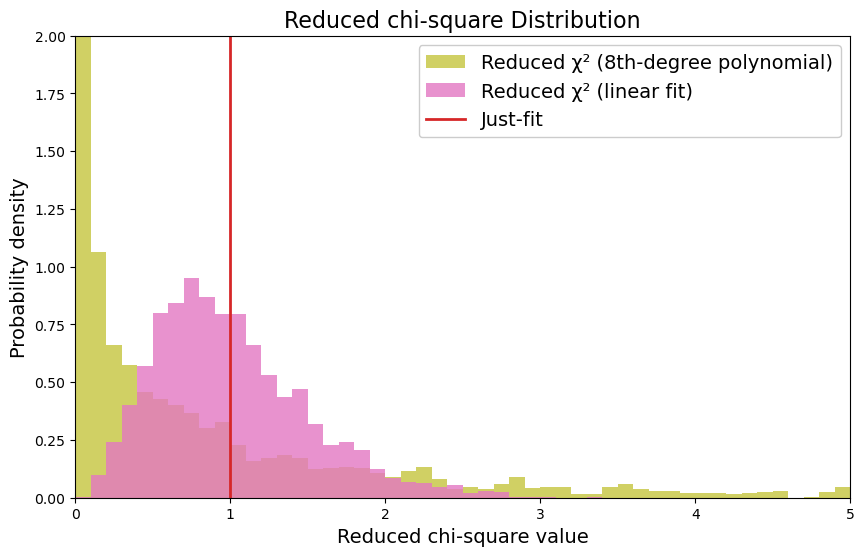

In [19]:
#chi square直方圖
plt.figure(figsize=(10, 6))
plt.hist(chi2_values_overfit, bins=50, density=True, alpha=0.7, 
         label='Reduced χ² (8th-degree polynomial)', color='C8', range=(0, 5), histtype='stepfilled')
plt.hist(chi2_values/8, bins=50, density=True, alpha=0.8, 
         label='Reduced χ² (linear fit)', color='C6', range=(0, 5), histtype='stepfilled')
plt.plot([1, 1], [0, 2], linestyle='-', color="C3", lw=2, label='Just-fit')
plt.title('Reduced chi-square Distribution', fontsize=16)
plt.xlabel('Reduced chi-square value', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.xlim(left=0, right=5)
plt.ylim(bottom=0, top=2)
plt.legend(fontsize=14, framealpha=1)
plt.savefig("output1_2_hist_compare.pdf", transparent=True)
plt.show()

# Practice 2

In [20]:
#根據chi square值排序，取得排序後的索引
sorted_indices = np.argsort(chi2_values)

#將排序後的擬合參數依區段分成五區（每區400組）
num_per_group = 400
chisq_groups = []
a_groups = []
b_groups = []

for i in range(5):
    #取出這一區的index
    idx = sorted_indices[i*num_per_group : (i+1)*num_per_group]
    chisq_groups.append(chi2_values[idx])  #取出chi square值
    a_groups.append(a_list[idx])  #取出a值
    b_groups.append(b_list[idx])  #取出b值

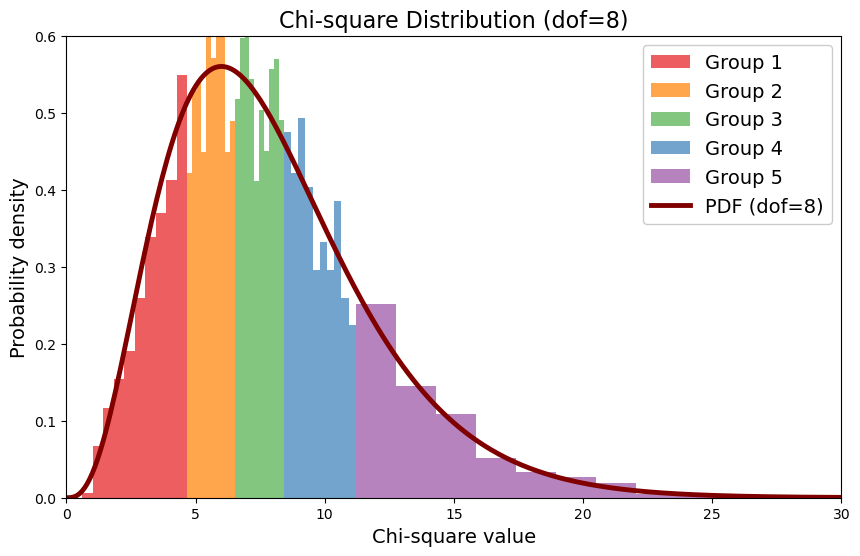

In [21]:
colors = [  '#e41a1c',  # Red
            '#ff7f00', # Orange
            '#4daf4a',  # Green
            '#377eb8',  # Blue
            '#984ea3',  # Purple
            ] 

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.hist(chisq_groups[i], bins=10, density=True, alpha=0.7, label=f'Group {i+1}', color=colors[i],
             histtype='stepfilled')
plt.plot(x_chi, chi2.pdf(x_chi, df=8)*5, linestyle='-', color='maroon', label='PDF (dof=8)', 
         linewidth=3.5)
plt.title('Chi-square Distribution (dof=8)', fontsize=16)
plt.xlabel('Chi-square value', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.xlim(left=0, right=30)
plt.ylim(bottom=0, top=0.6)
plt.legend(fontsize=14, framealpha=1)
plt.savefig("output2_1_chi_grouped.pdf", transparent=True)
plt.show()


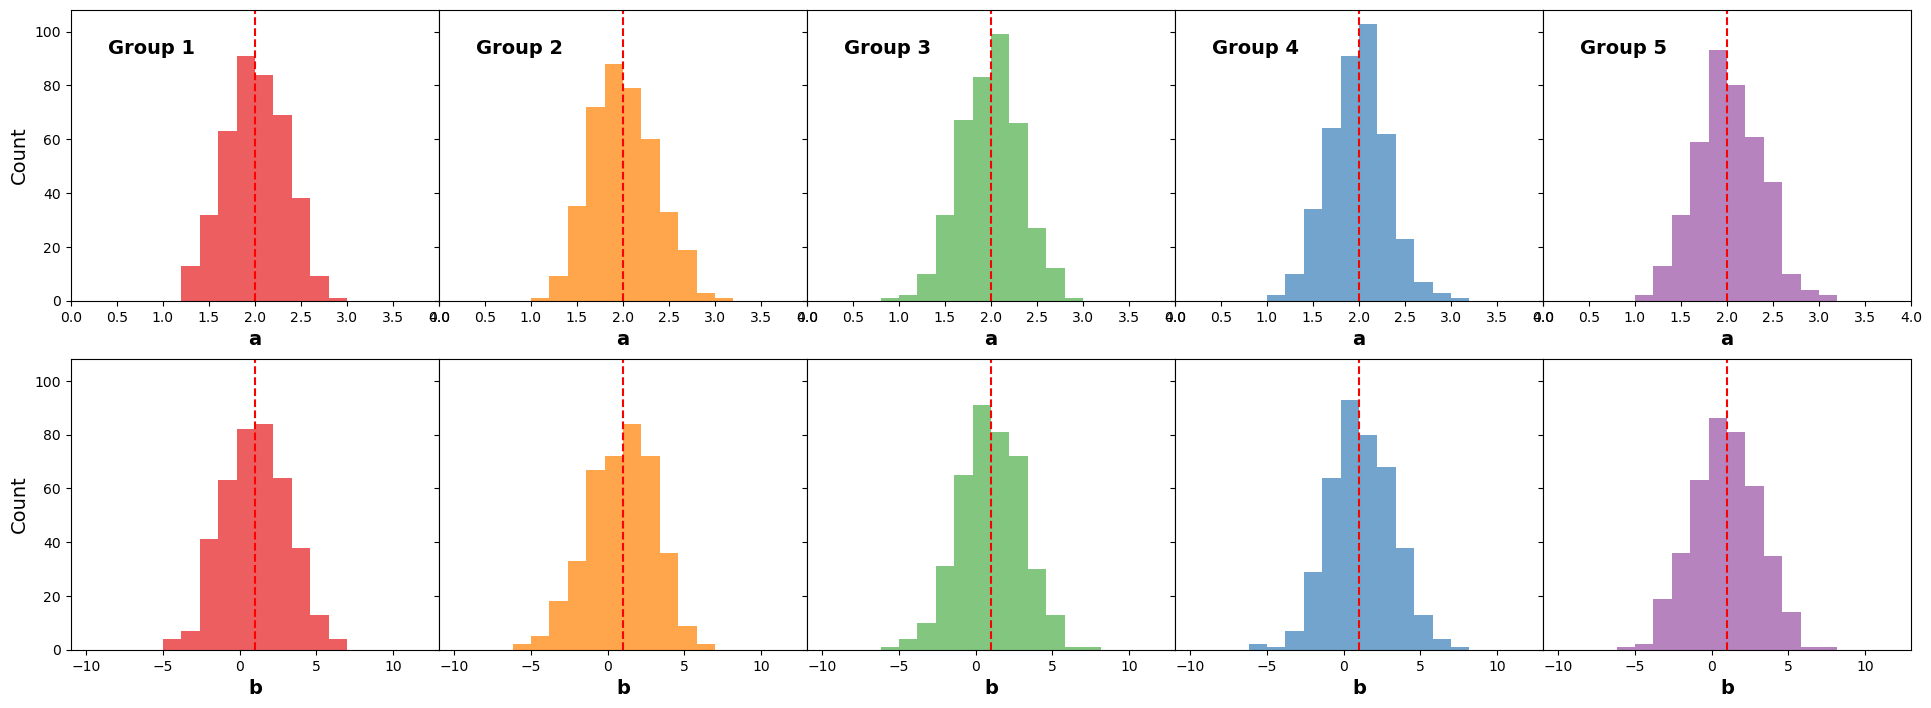

In [22]:
#畫出每一區的a和b直方圖
fig, axs = plt.subplots(2, 5, figsize=(20, 8), sharey=True)
plt.subplots_adjust(left=0.05, right=0.97, top=0.9, bottom=0.1, hspace=0.2, wspace=0)
for i in range(5):
    axs[0, i].hist(a_groups[i], bins=20, alpha=0.7, color=colors[i], range=(0, 4), 
                   histtype='stepfilled')
    axs[0, i].axvline(true_a, color='r', linestyle='--')
    axs[0, i].text(0.1, 0.85, f'Group {i+1}', fontsize=14, color='black', transform=axs[0, i].transAxes,
                   fontweight='bold')
    # axs[0, i].set_title(f'Group {i+1} (a)')
    axs[0, i].set_xlabel('a', fontsize=14, fontweight='semibold')
    if i == 0:
        axs[0, i].set_ylabel('Count', fontsize=14)
    axs[0, i].set_xlim(left=0, right=4)
    


    axs[1, i].hist(b_groups[i], bins=20, alpha=0.7, color=colors[i], range=(-11, 13), 
                   histtype='stepfilled')
    axs[1, i].axvline(true_b, color='r', linestyle='--')
    if i == 0:
        axs[1, i].set_ylabel('Count', fontsize=14)
    axs[1, i].set_xlabel('b', fontsize=14, fontweight='semibold')
    axs[1, i].set_xlim(left=-11, right=13)
    

# plt.tight_layout()
plt.savefig("output2_1.pdf", transparent=True)
plt.show()

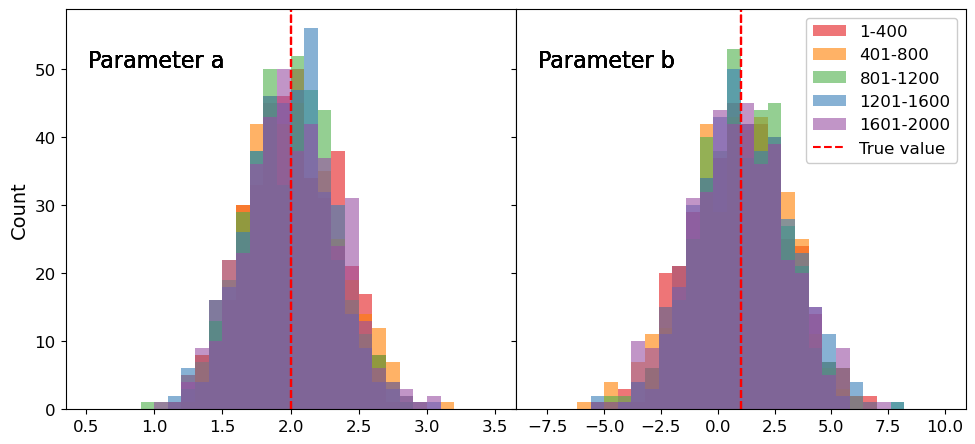

In [23]:
#畫出每一區的a和b直方圖
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, hspace=0, wspace=0)

legends = ['1-400', '401-800', '801-1200', '1201-1600', '1601-2000']

colors = [  '#e41a1c',  # Red
            '#ff7f00', # Orange
            '#4daf4a',  # Green
            '#377eb8',  # Blue
            '#984ea3',  # Purple
            ]  

for i in range(5):
    axs[0].hist(a_groups[i], bins=30, alpha=0.6, color=colors[i], label=legends[i], range=(0.5, 3.5), 
                histtype='stepfilled')
    axs[0].text(0.05, 0.9, "Parameter a", transform=axs[0].transAxes, fontsize=16, 
                verticalalignment='top', horizontalalignment='left')
    axs[0].axvline(true_a, color='r', linestyle='--', label='__no_legend__')
    # axs[0].set_title(f'Group {i+1} (a)')
    # axs[0].set_xlabel('a', fontsize=14)
    axs[0].set_ylabel('Count', fontsize=14)
    axs[0].tick_params(labelsize=12)


    axs[1].hist(b_groups[i], bins=30, alpha=0.6, color=colors[i], label=legends[i], 
                range=(-8, 10), histtype="stepfilled", stacked=True)
    axs[1].text(0.05, 0.9, "Parameter b", transform=axs[1].transAxes, fontsize=16, 
                verticalalignment='top', horizontalalignment='left')
    axs[1].axvline(true_b, color='r', linestyle='--', label='True value' if i == 4 else '__no_legend__')
    axs[1].tick_params(labelsize=12)

# plt.tight_layout()
plt.legend(loc='upper right', fontsize=12, framealpha=1)
plt.savefig("output2_1_combine.pdf", transparent=True)
plt.show()

# Practice 3

In [24]:
#對每個x值，計算y的平均與標準差
y_all = np.array(all_data)  #shape = (2000, 10)
y_mean = np.mean(y_all, axis=0)  #對2000組取平均
y_std = np.std(y_all, axis=0, ddof=1)  #標準差

In [25]:
print(y_mean)
print(y_std)

[ 3.0656936   5.0793987   6.88306683  8.94759296 11.02849422 13.02487273
 15.07949798 16.99405315 18.99715855 21.07114231]
[3.05788129 2.96555523 2.99775555 2.97468334 3.02764252 3.06086417
 3.0472365  3.0177304  3.03627014 2.87760521]


In [26]:
#x軸（每組共用）
x = np.linspace(1, 10, 10, endpoint=True)
params, cov_matrix = curve_fit(linear_func, x, y_mean, sigma=y_std, absolute_sigma=True)
a_fit, b_fit = params

In [27]:

print(f"線性擬合參數: a = {a_fit:.3f}, b = {b_fit:.3f}")
print("共變異數矩陣:")
print(cov_matrix)
#[0, 0] represents the variance of a (slope)
#[1, 1] represents the variance of b (intercept)
#[0, 1] or [1, 0] represents the covariance between a and b, indicating how changes in a relate to changes in b.
#This indicates that when slope a increases, intercept b tends to decrease — a typical compensation relationship between linear parameters.

線性擬合參數: a = 2.003, b = 1.002
共變異數矩陣:
[[ 0.10794169 -0.59670468]
 [-0.59670468  4.20152973]]


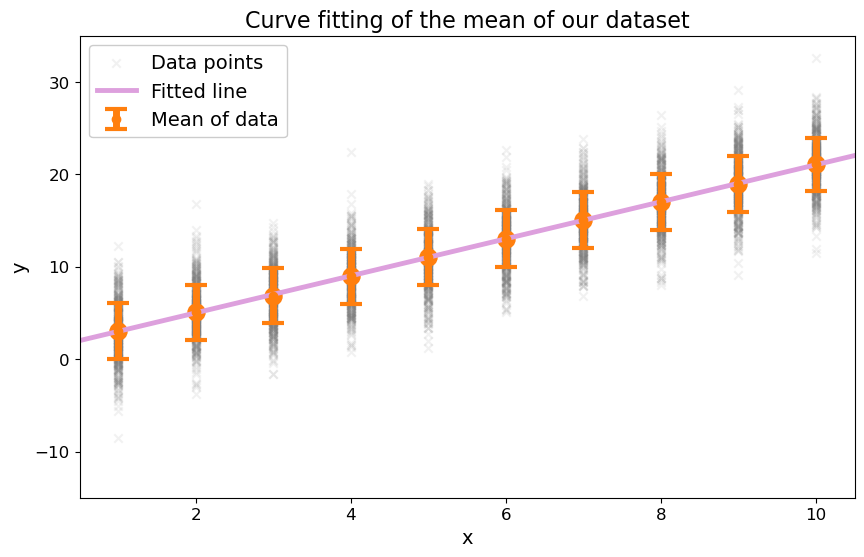

In [28]:
#畫出資料點
plt.figure(figsize=(10, 6))
x_plot = np.linspace(-1, 11, 100)
for i in sampled_sets:
    plt.scatter(x, all_data[i, :], color='C7', alpha=0.1, marker='x', label='Data points' if i == sampled_sets[0] else '__no_legend__')
plt.errorbar(x, y_mean, yerr=y_std, fmt='o', color='C1', alpha=1, capsize=8, label='Mean of data', 
             elinewidth=5, capthick=3)
plt.scatter(x, y_mean, color='C1', alpha=1, label='__no_legend__', s=150)
plt.plot(x_plot, linear_func(x_plot, a_fit, b_fit), color='plum', alpha=1, 
         linewidth=3.5, label='Fitted line')
plt.title('Curve fitting of the mean of our dataset', fontsize=16)
plt.xlim(0.5, 10.5)
plt.ylim(-15, 35)
plt.xlabel('x', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper left', framealpha=1)
plt.savefig("output3_1.pdf", transparent=True)
plt.show()

<Figure size 1200x400 with 0 Axes>

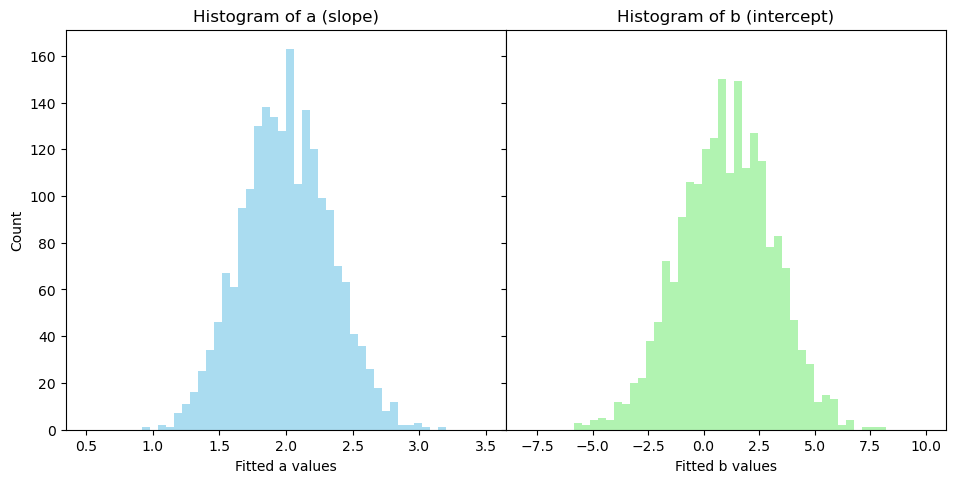

In [29]:
#繪製a與b的直方圖與2D直方圖
plt.figure(figsize=(12, 4))
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
plt.subplots_adjust(left=0.07, right=0.95, top=0.9, bottom=0.1, hspace=0, wspace=0)
# plt.subplot(1, 2, 1)
ax[0].hist(a_list, bins=50, alpha=0.7, color='skyblue', range=(0.5, 3.5), histtype='stepfilled')
ax[0].set_xlabel("Fitted a values")
ax[0].set_ylabel("Count")
ax[0].set_title("Histogram of a (slope)")
#plt.savefig("output.3_1.pdf", transparent=True)


ax[1].hist(b_list, bins=50, alpha=0.7, color='lightgreen', range=(-8, 10), histtype='stepfilled')
ax[1].set_xlabel("Fitted b values")
# ax[1].set_ylabel("Count")
ax[1].set_title("Histogram of b (intercept)")
plt.savefig("output3_2.pdf", transparent=True)
plt.show()

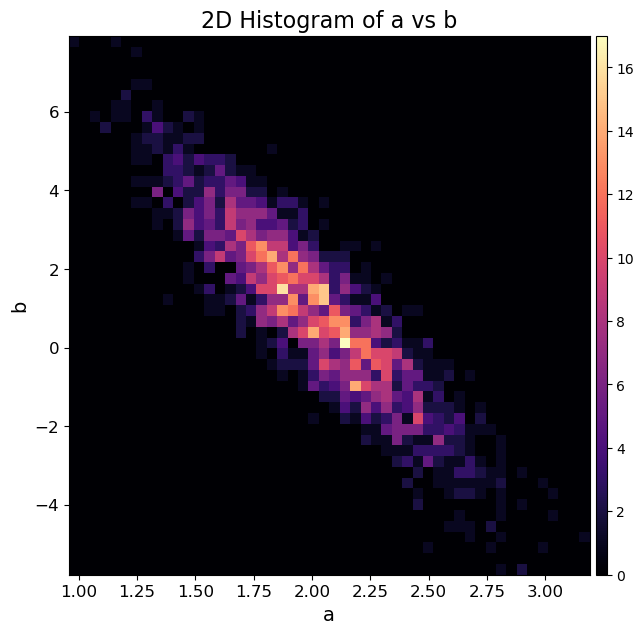

In [30]:
#2D直方圖
plt.figure(figsize=(8, 7))
hist2d = plt.hist2d(a_list, b_list, bins=50, cmap='magma')
plt.xlabel("a", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("b", fontsize=14)
plt.yticks(fontsize=12)
plt.title("2D Histogram of a vs b", fontsize=16)
plt.colorbar(pad=0.01, aspect=50)
plt.grid(False)
plt.savefig("output3_3.pdf", transparent=True)
plt.show()

<Figure size 600x600 with 0 Axes>

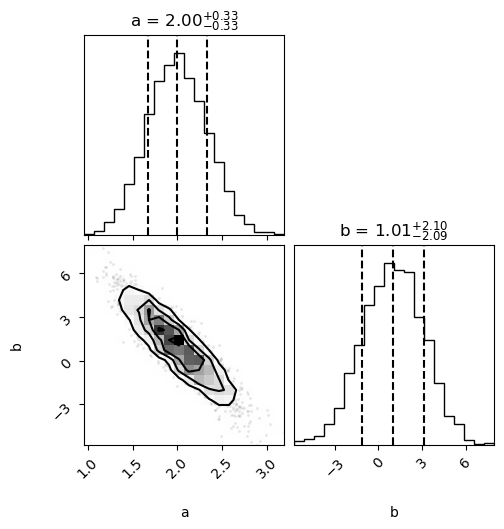

In [31]:
import corner

# Combine the two parameters into a single array for corner plot
data = np.vstack((a_list, b_list)).T

fig = plt.figure(figsize=(6, 6))
# Create the corner plot
figure = corner.corner(data, labels=["a", "b"], 
                    #    truths=[true_a, true_b], truth_color="k", 
                       show_titles=True, title_fmt=".2f", title_kwargs={"fontsize": 12}, 
                       quantiles=[0.16, 0.5, 0.84], plot_datapoints=True)

# Save the plot
figure.savefig("output3_3_corner.pdf", transparent=True)
plt.show()

In [32]:
#計算共變異數與相關係數
cov_ab = np.cov(a_list, b_list)
corr_ab = np.corrcoef(a_list, b_list)

print("Covariance matrix of [a, b]:")
print(cov_ab)
print("Correlation coefficient matrix of [a, b]:")
print(corr_ab)

#擬合a vs b的關係線，觀察是否線性
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(a_list, b_list)

print(f"Linear fit b = m * a + c:\nSlope = {slope:.3f}, Intercept = {intercept:.3f}")
print(f"Correlation coefficient (r) = {r_value:.3f}, R² = {r_value**2:.3f}")

Covariance matrix of [a, b]:
[[ 0.10879108 -0.61514693]
 [-0.61514693  4.35851386]]
Correlation coefficient matrix of [a, b]:
[[ 1.         -0.89333222]
 [-0.89333222  1.        ]]
Linear fit b = m * a + c:
Slope = -5.654, Intercept = 12.326
Correlation coefficient (r) = -0.893, R² = 0.798
